In [47]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#load audio files
apnea_file0 = '../data/ssbpr/SSBPR/306221017-013234-0.wav'
apnea_file1 = '../data/ssbpr/SSBPR/306221017-015648-1.wav'
apnea_file2 = '../data/ssbpr/SSBPR/306221020-020000-2.wav'
apnea_file3 = '../data/ssbpr/SSBPR/307221208-024342-3.wav'
apnea_file4 = '../data/ssbpr/SSBPR/306221020-015654-4.wav'
apnea_file5 = '../data/ssbpr/SSBPR/307230201-055329-5.wav'

In [34]:
ipd.Audio(apnea_file1)

In [35]:
ipd.Audio(apnea_file2)

In [36]:
ipd.Audio(apnea_file3)

In [37]:
apnea0, sr = librosa.load(apnea_file0)
apnea1, sr = librosa.load(apnea_file1)
apnea2, sr = librosa.load(apnea_file2)
apnea3, sr = librosa.load(apnea_file3)
apnea4, sr = librosa.load(apnea_file4)
apnea5, sr = librosa.load(apnea_file5)

In [96]:
print(sr)

22050


In [38]:
apnea1

array([ 1.8144364e-04,  7.6148302e-05,  1.6808785e-04, ...,
       -5.3872308e-04, -4.3021084e-04,  1.4994065e-04], dtype=float32)

In [39]:
apnea1.size

49836

In [40]:
#duration od 1 sample
sample_duration = 1 /sr
print(f"Duration of 1 sample is: {sample_duration:.6f} seconds")

Duration of 1 sample is: 0.000045 seconds


In [41]:
#duration of the audio signal in seconds
duration = sample_duration * len(apnea1)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 2.26 seconds


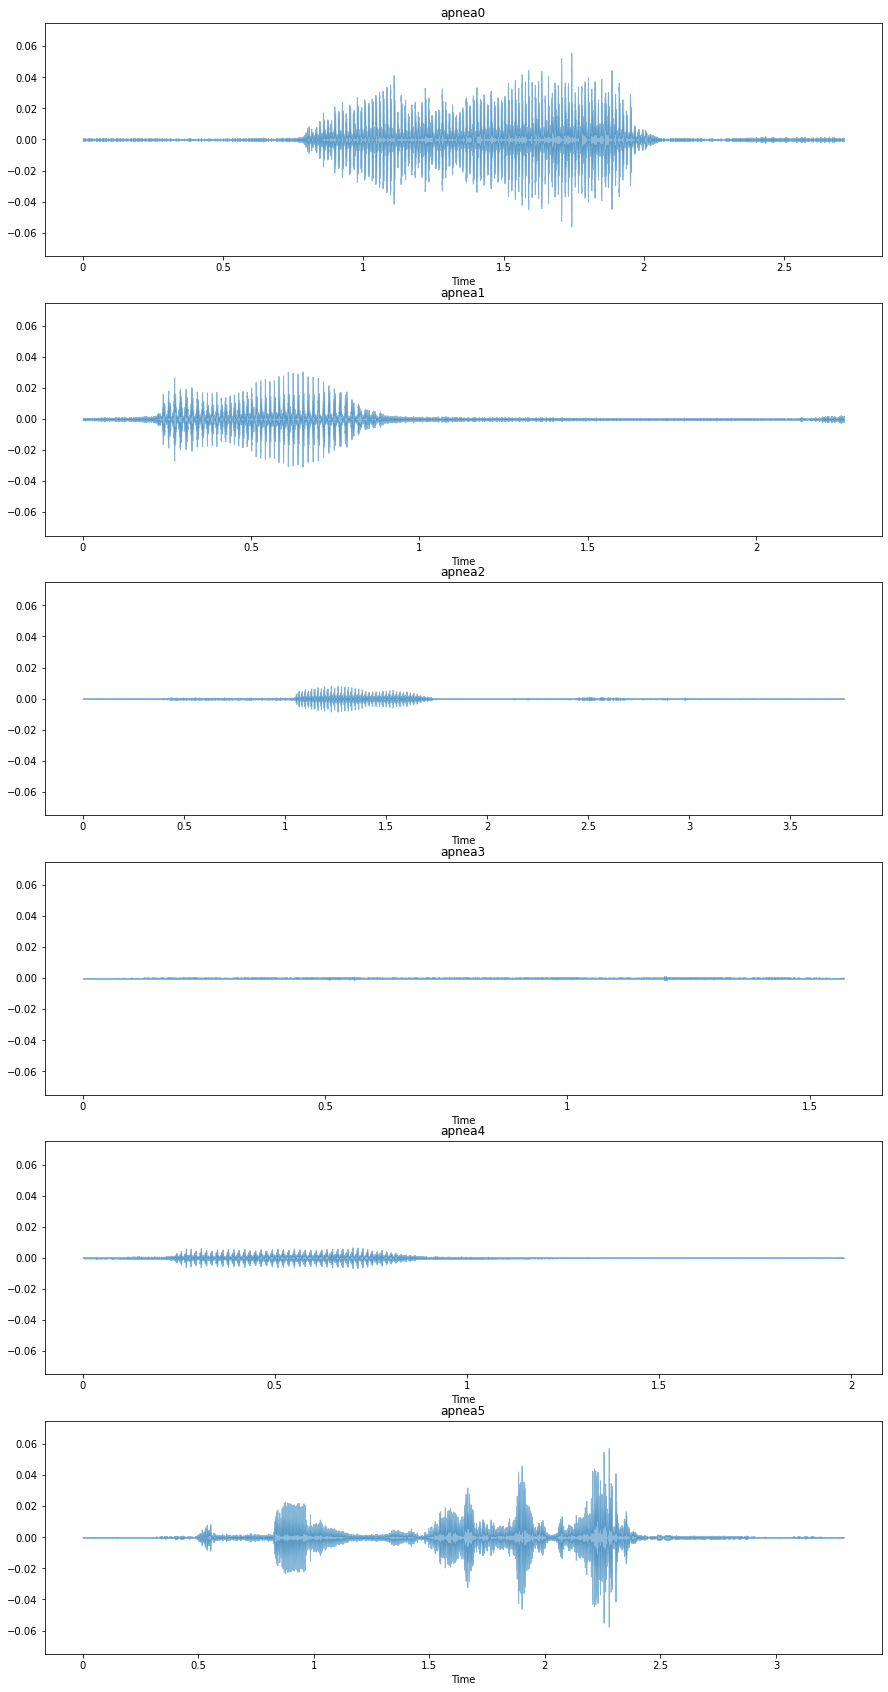

In [45]:
#visualize the waveforms

plt.figure(figsize = (15,30))

plt.subplot(6,1,1)
librosa.display.waveshow(apnea0, alpha = 0.5)
plt.title("apnea0")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,2)
librosa.display.waveshow(apnea1, alpha = 0.5)
plt.title("apnea1")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,3)
librosa.display.waveshow(apnea2,alpha = 0.5)
plt.title("apnea2")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,4)
librosa.display.waveshow(apnea3, alpha = 0.5)
plt.title("apnea3")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,5)
librosa.display.waveshow(apnea4, alpha = 0.5)
plt.title("apnea4")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,6)
librosa.display.waveshow(apnea5, alpha = 0.5)
plt.title("apnea5")
plt.ylim((-0.075,0.075))

plt.show()

In [87]:
FRAME_SIZE = 128
HOP_LENGTH = 64

#calculate the amplitude envelop
def amplitude_envelope(signal,frame_size,hop_length):
    amplitude_envelop = []
    #calculate AE for each frame
    for i in range(0, len(signal),hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelop.append(current_frame_amplitude_envelope)
        
    return np.array(amplitude_envelop)
        

def fancy_amplitude_envelope(signal,frame_size,hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size,hop_length)])

59803

In [88]:
ae_apnea0 = amplitude_envelope(apnea0,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea0)

935

In [89]:
ae_apnea1 = fancy_amplitude_envelope(apnea1,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea1)

779

In [90]:
ae_apnea2 = fancy_amplitude_envelope(apnea2,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea1)

779

In [91]:
ae_apnea3 = fancy_amplitude_envelope(apnea3,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea3)

542

In [92]:
ae_apnea4 = fancy_amplitude_envelope(apnea4,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea4)

683

In [93]:
ae_apnea5 = fancy_amplitude_envelope(apnea5,FRAME_SIZE,HOP_LENGTH)
len(ae_apnea5)

1135

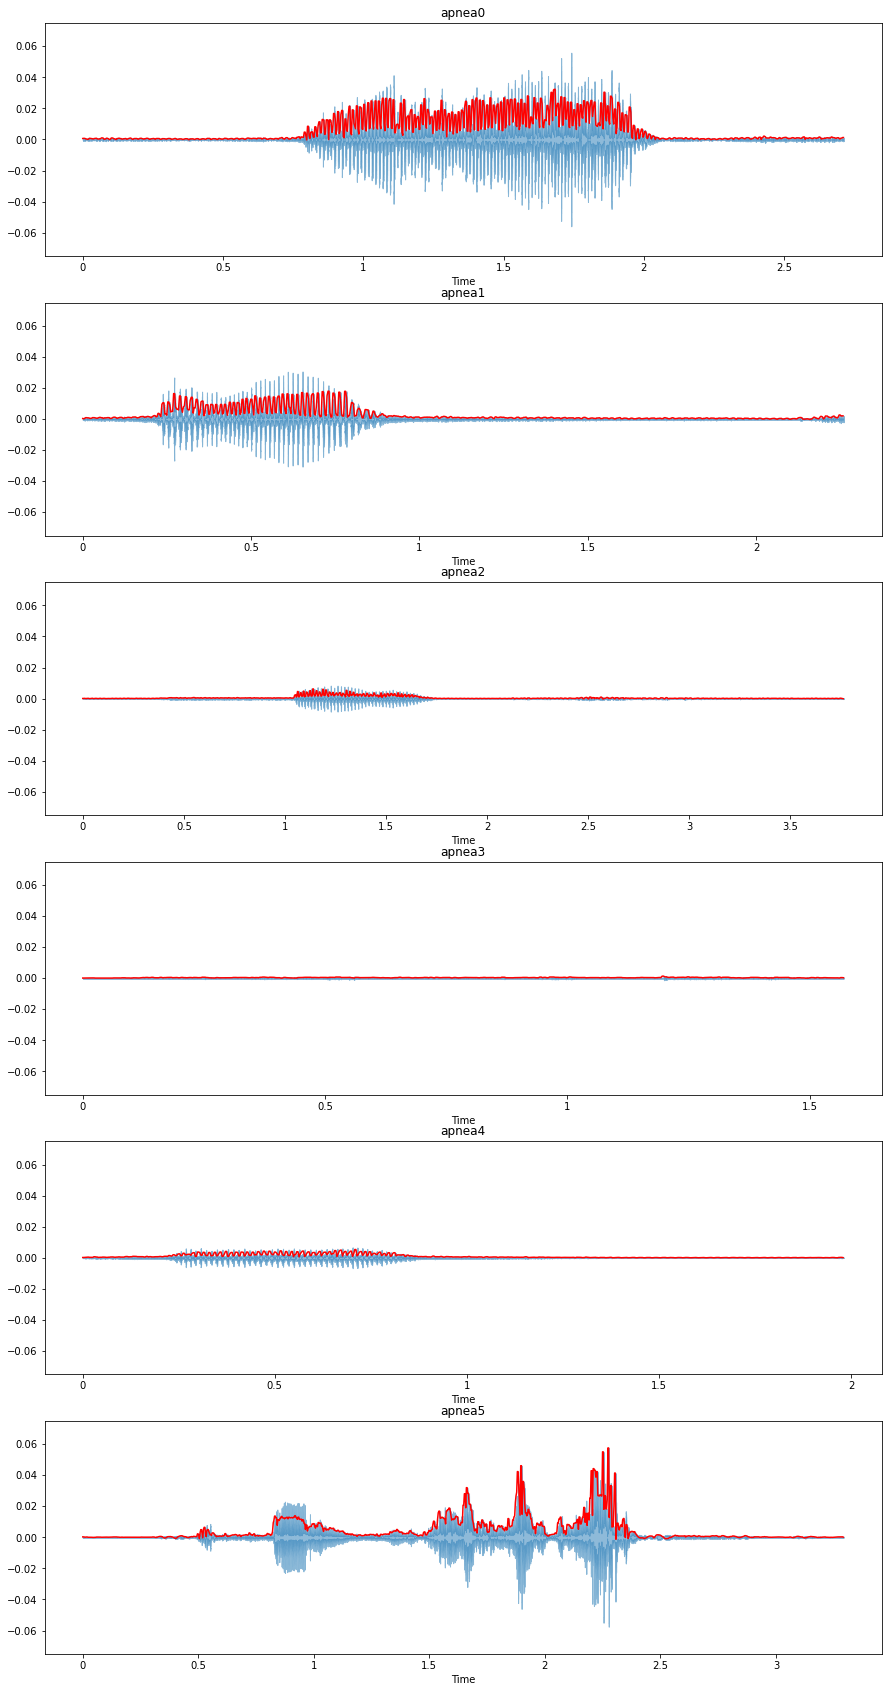

In [94]:
#visualize amplitude envelop for all audio files

frames0 = range(0,ae_apnea0.size)
t0 = librosa.frames_to_time(frames0,hop_length = HOP_LENGTH)
frames1 = range(0,ae_apnea1.size)
t1 = librosa.frames_to_time(frames1,hop_length = HOP_LENGTH)
frames2 = range(0,ae_apnea2.size)
t2 = librosa.frames_to_time(frames2,hop_length = HOP_LENGTH)
frames3 = range(0,ae_apnea3.size)
t3 = librosa.frames_to_time(frames3,hop_length = HOP_LENGTH)
frames4 = range(0,ae_apnea4.size)
t4 = librosa.frames_to_time(frames4,hop_length = HOP_LENGTH)
frames5 = range(0,ae_apnea5.size)
t5 = librosa.frames_to_time(frames5,hop_length = HOP_LENGTH)


plt.figure(figsize = (15,30))

plt.subplot(6,1,1)
librosa.display.waveshow(apnea0, alpha = 0.5)
plt.plot(t0,ae_apnea0,color = 'r')
plt.title("apnea0")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,2)
librosa.display.waveshow(apnea1, alpha = 0.5)
plt.plot(t1,ae_apnea1,color = 'r')
plt.title("apnea1")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,3)
librosa.display.waveshow(apnea2,alpha = 0.5)
plt.plot(t2,ae_apnea2,color = 'r')
plt.title("apnea2")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,4)
librosa.display.waveshow(apnea3, alpha = 0.5)
plt.plot(t3,ae_apnea3,color = 'r')
plt.title("apnea3")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,5)
librosa.display.waveshow(apnea4, alpha = 0.5)
plt.plot(t4,ae_apnea4,color = 'r')
plt.title("apnea4")
plt.ylim((-0.075,0.075))

plt.subplot(6,1,6)
librosa.display.waveshow(apnea5, alpha = 0.5)
plt.plot(t5,ae_apnea5,color = 'r')
plt.title("apnea5")
plt.ylim((-0.075,0.075))

plt.show()